In [1]:
import pandas as pd
import numpy as np

In [3]:
# Importing dataset
covid_data = pd.read_csv(r"C:\Users\HP\Desktop\DATAS\my_datasets\covid 19 datasets.csv")
covid_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
covid_datas = covid_data.iloc[:, 0:5]
covid_datas.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
5,Antigua and Barbuda,86,3,65,18
6,Argentina,167416,3059,72575,91782
7,Armenia,37390,711,26665,10014
8,Australia,15303,167,9311,5825
9,Austria,20558,713,18246,1599


In [8]:
covid_datas.shape


(187, 5)

In [9]:
covid_datas.info() ##some info about our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
Country/Region    187 non-null object
Confirmed         187 non-null int64
Deaths            187 non-null int64
Recovered         187 non-null int64
Active            187 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.4+ KB


In [10]:
covid_datas.nunique()

Country/Region    187
Confirmed         184
Deaths            150
Recovered         178
Active            173
dtype: int64

In [11]:
covid_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [12]:
covid_datas.count()

Country/Region    187
Confirmed         187
Deaths            187
Recovered         187
Active            187
dtype: int64

In [14]:
covid_datas.isnull().sum() ##to check how many null values we have...


Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt  ## for visualization so that it look more interactive.


# Number of comfirmed, deaths, recovered and active in each region

In [16]:
df=covid_datas.groupby('Country/Region').sum().head(10)
df


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,36263,1269,25198,9796
Albania,4880,144,2745,1991
Algeria,27973,1163,18837,7973
Andorra,907,52,803,52
Angola,950,41,242,667
Antigua and Barbuda,86,3,65,18
Argentina,167416,3059,72575,91782
Armenia,37390,711,26665,10014
Australia,15303,167,9311,5825


In [19]:
df.max()

Confirmed    167416
Deaths         3059
Recovered     72575
Active        91782
dtype: int64

In [20]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,10.000000,10.000000,10.000000,10.000000
mean,31172.600000,732.200000,17468.700000,12971.700000
std,49987.413154,944.348782,21970.241707,27972.199453
min,86.000000,3.000000,65.000000,18.000000
25%,1932.500000,75.000000,1288.500000,900.000000
50%,17930.500000,439.000000,13778.500000,3908.000000
75%,34190.500000,1050.500000,23607.750000,9340.250000
max,167416.000000,3059.000000,72575.000000,91782.000000


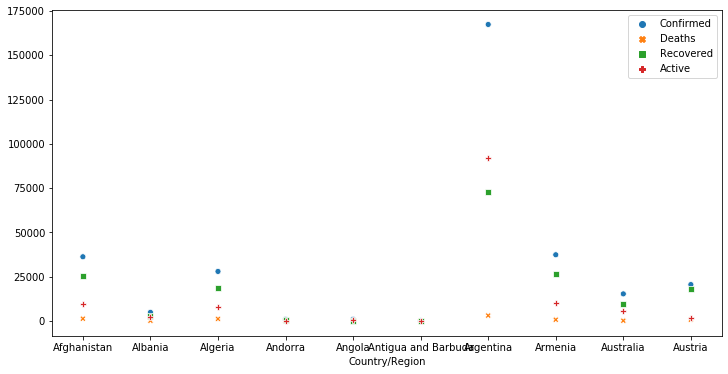

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df)

In [26]:
###Remove all the records where confirmed cases is less than 10.

covid_dataset=covid_datas[~(covid_datas.Confirmed < 40000)]
covid_dataset

,Country/Region,Confirmed,Deaths,Recovered,Active
6,Argentina,167416,3059,72575,91782
13,Bangladesh,226225,2965,125683,97577
15,Belarus,67251,538,60492,6221
16,Belgium,66428,9822,17452,39154
20,Bolivia,71181,2647,21478,47056
23,Brazil,2442375,87618,1846641,508116
32,Canada,116458,8944,0,107514
35,Chile,347923,9187,319954,18782
36,China,86783,4656,78869,3258
37,Colombia,257101,8777,131161,117163


# In which region maximum number of cases are recorded?

In [30]:
confirmed_data=covid_datas.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(11)
confirmed_data

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Pakistan           274289
Name: Confirmed, dtype: int64

# In which region minimum number of cases are recorded?

In [31]:
confirmed_data_min=covid_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=True).head(21)
confirmed_data_min

Country/Region
Western Sahara                       10
Holy See                             12
Greenland                            14
Saint Kitts and Nevis                17
Dominica                             18
Laos                                 20
Grenada                              23
Timor-Leste                          24
Saint Lucia                          24
Fiji                                 27
Belize                               48
Saint Vincent and the Grenadines     52
Papua New Guinea                     62
Antigua and Barbuda                  86
Liechtenstein                        86
Bhutan                               99
Barbados                            110
Seychelles                          114
Monaco                              116
Brunei                              141
Trinidad and Tobago                 148
Name: Confirmed, dtype: int64

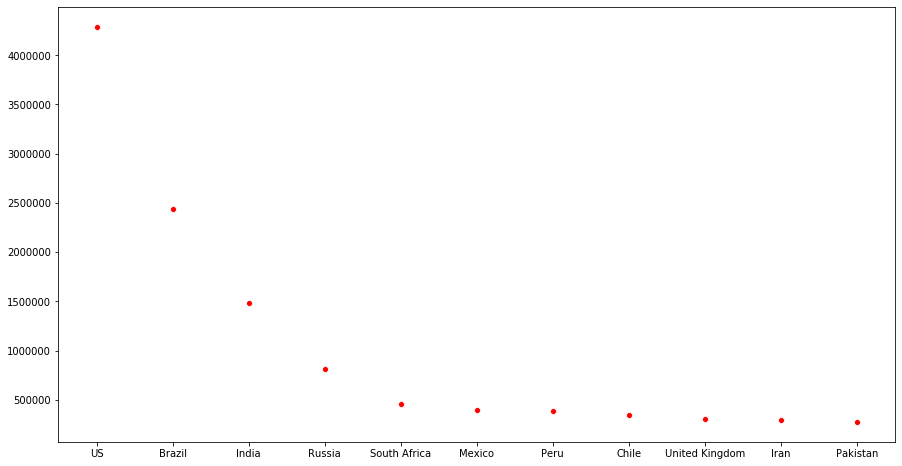

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=confirmed_data,color='r')

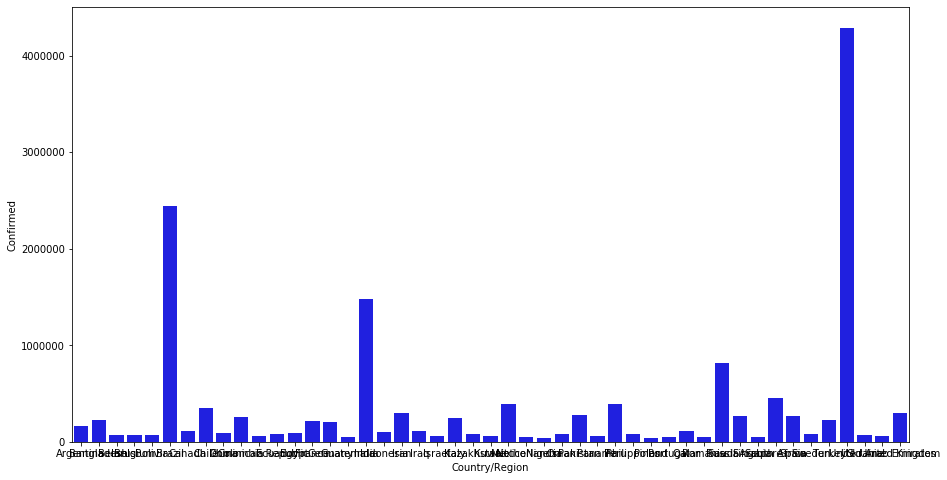

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x="Country/Region", y="Confirmed",data=covid_dataset,color='b')

In [50]:
covid_datasets=covid_datas[~(covid_datas.Confirmed < 250000)]
covid_datasets

,Country/Region,Confirmed,Deaths,Recovered,Active
23,Brazil,2442375,87618,1846641,508116
35,Chile,347923,9187,319954,18782
37,Colombia,257101,8777,131161,117163
79,India,1480073,33408,951166,495499
81,Iran,293606,15912,255144,22550
111,Mexico,395489,44022,303810,47657
128,Pakistan,274289,5842,241026,27421
132,Peru,389717,18418,272547,98752
138,Russia,816680,13334,602249,201097
145,Saudi Arabia,268934,2760,222936,43238


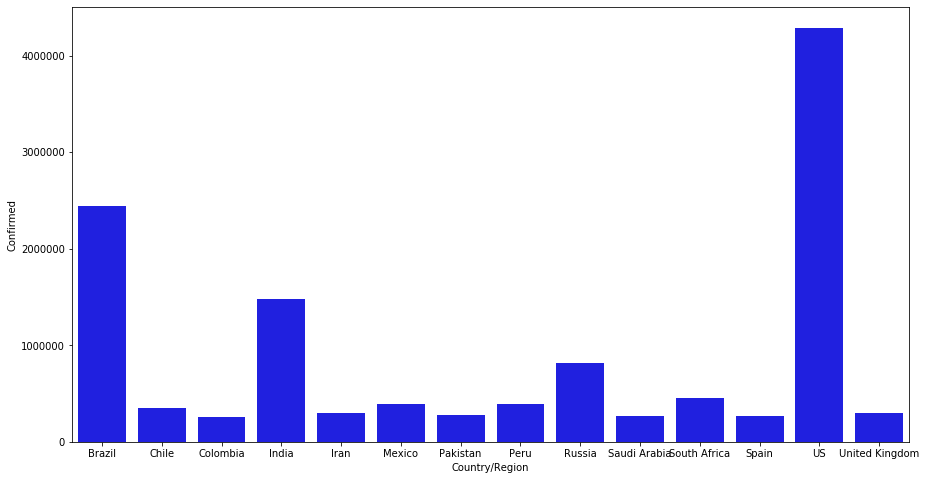

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x="Country/Region", y="Confirmed",data=covid_datasets,color='b')

# In which region maximum number of death are recorded?

In [57]:
death_data=covid_datas.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
death_data

Country/Region
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
India              33408
France             30212
Spain              28432
Peru               18418
Iran               15912
Name: Deaths, dtype: int64

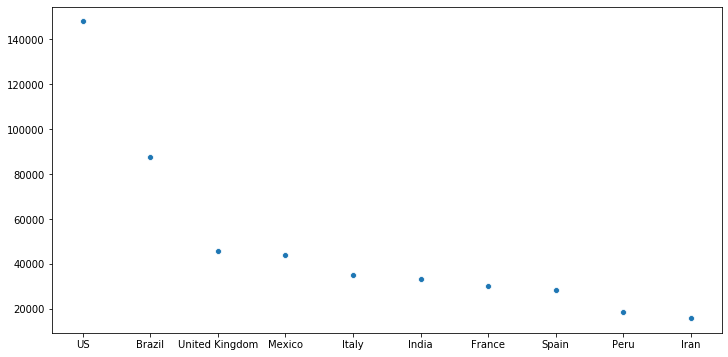

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=death_data)

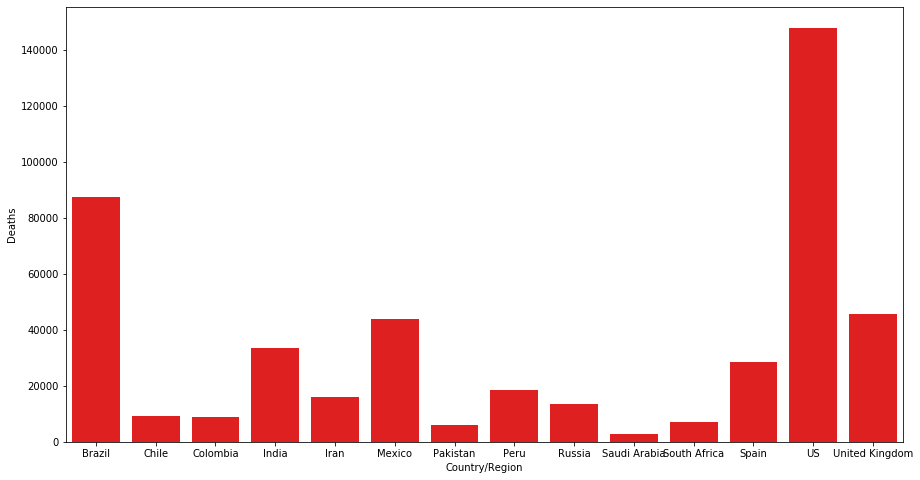

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(x="Country/Region", y="Deaths",data=covid_datasets,color='r')

# In which region maximum number of recovery are recorded? 

In [62]:
recover_data=covid_data.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(15)
recover_data


Country/Region
Brazil          1846641
US              1325804
India            951166
Russia           602249
Chile            319954
Mexico           303810
South Africa     274925
Peru             272547
Iran             255144
Pakistan         241026
Saudi Arabia     222936
Turkey           210469
Italy            198593
Germany          190314
Spain            150376
Name: Recovered, dtype: int64

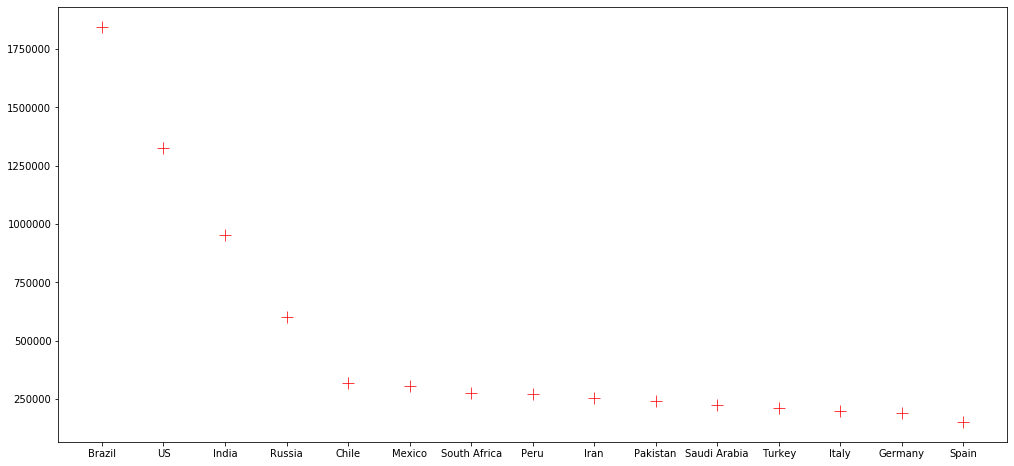

In [63]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=recover_data,color='r',marker='+',s=150)

# In which region minimum number of deaths cases are recorded?

In [69]:
# Minimum number of death for confirmed cases greater than 40000
min_death=covid_dataset.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=True).head(10)
min_death

Country/Region
Singapore                 27
Qatar                    165
United Arab Emirates     345
Oman                     393
Kuwait                   438
Israel                   474
Belarus                  538
Kazakhstan               585
Nigeria                  860
Dominican Republic      1083
Name: Deaths, dtype: int64

# How many confirmed,deaths and recovered cases are there from Nigeria till 7th August 2020?

In [70]:
Nigeria_df=covid_data[covid_data['Country/Region'] == 'Nigeria']
Nigeria_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
124,Nigeria,41180,860,18203,22117,648,2,829,2.09,44.2,4.72,37225,3955,10.62,Africa


In [71]:
Nigeria_df1=covid_datas[covid_datas['Country/Region'] == 'Nigeria']
Nigeria_df1

,Country/Region,Confirmed,Deaths,Recovered,Active
124,Nigeria,41180,860,18203,22117


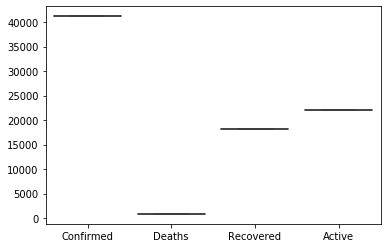

In [73]:
sns.boxplot(data=Nigeria_df1)